# Load Dataset

Start by downloading [Telcom Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data) dataset from Kaggle

In [1]:
import pandas as pd
import numpy as np

file = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file)

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Understanding the structure of the data

In [3]:
# returns column names as a list
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [4]:
# Set customerID as index
df.set_index('customerID', inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

#### Data Cleaning

ensure data is consistent and free from errors

In [7]:
# replace missing values in TotalCharge with pd.NA
df['TotalCharges'] = df['TotalCharges'].replace(" ", pd.NA)

In [8]:
# convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

`convert to column`

In [9]:
# check for missing values in each column
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# return df where TotalCharges is null
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [11]:
# drop NA rows in TotalCharges
df = df.dropna(subset=['TotalCharges'], axis=0)

In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# check for duplicate entries
df.index.duplicated().sum()

np.int64(0)

In [14]:
# Encode churn no: 0, yes: 1
df['Churn'] = df['Churn'].str.strip().map({'No': 0, 'Yes': 1})

In [15]:
df['Churn'].head()

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
Name: Churn, dtype: int64

#### Exploratory Data Analysis (EDA)

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [17]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032.000000
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,NaN
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,NaN
mean,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,0.265785
std,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,0.441782
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,0.000000
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,0.000000
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,1.000000


In [18]:
# count of each class in Churn column
# df['Churn'].value_counts()

# percentage of each class in Churn column
df['Churn'].value_counts(normalize=True) * 100

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

Visualize categorical features vs churn

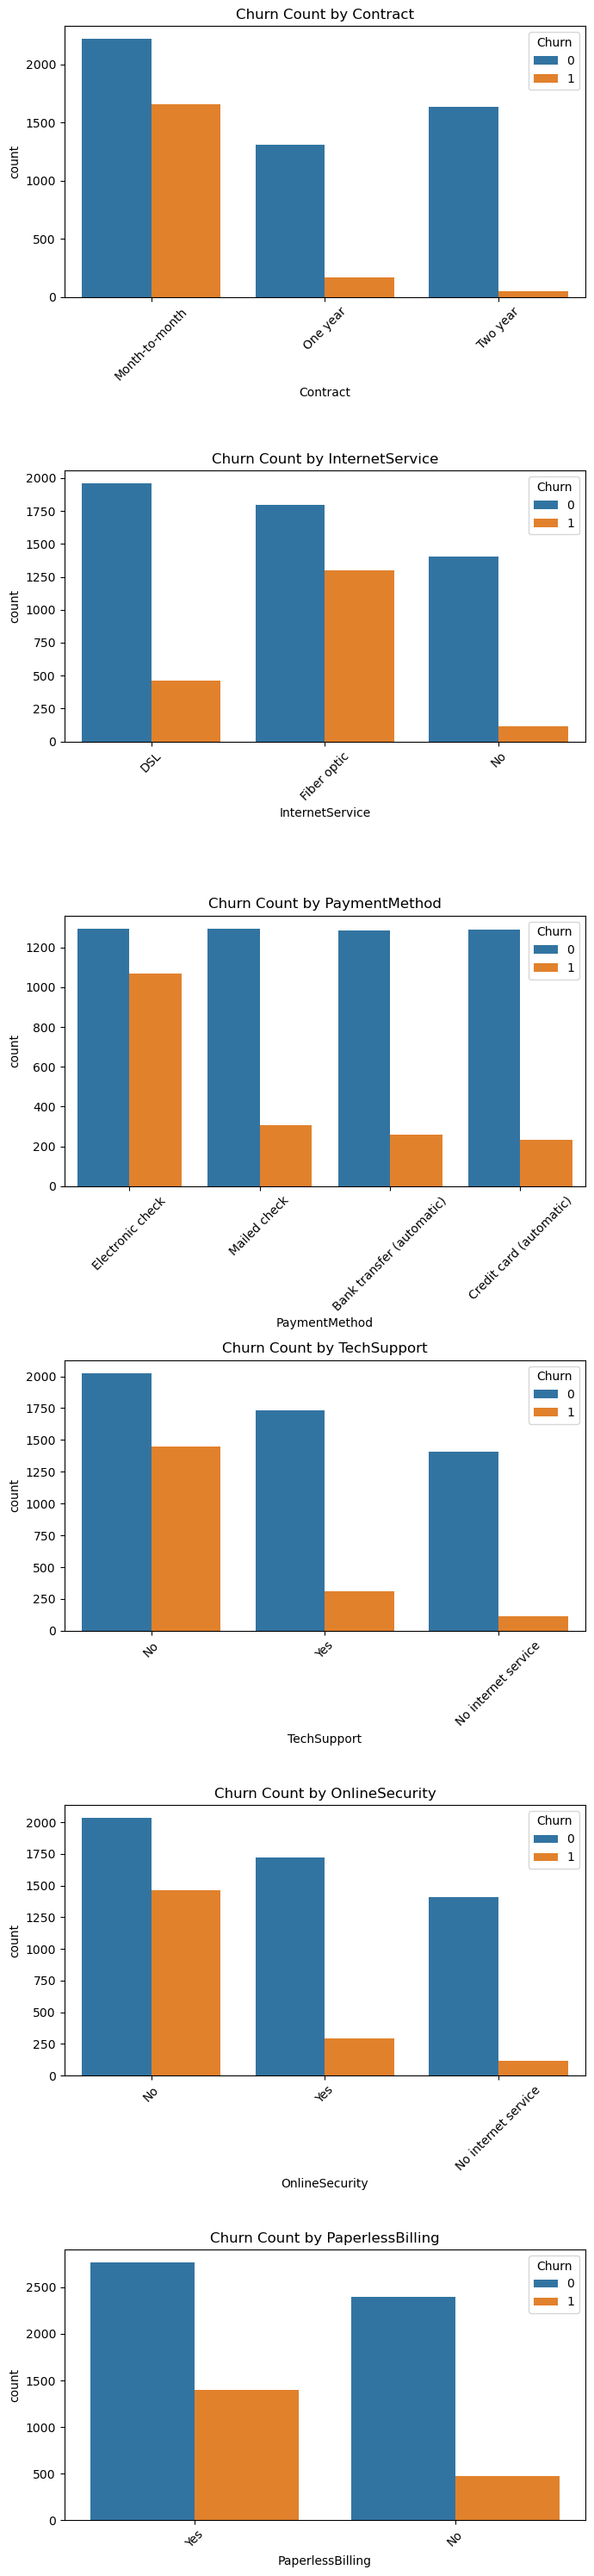

In [19]:
# Visualize categorical features vs churn
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(7, 30))

useful_cat_features = [
    'Contract', 'InternetService', 'PaymentMethod',
    'TechSupport', 'OnlineSecurity', 'PaperlessBilling',
]


for i, col in enumerate(useful_cat_features, 1):
    plt.subplot(len(useful_cat_features), 1, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn Count by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

Visualize numeric features vs churn

Box plots or violin plots to compare MonthlyCharges, TotalCharges, tenure by churn status.

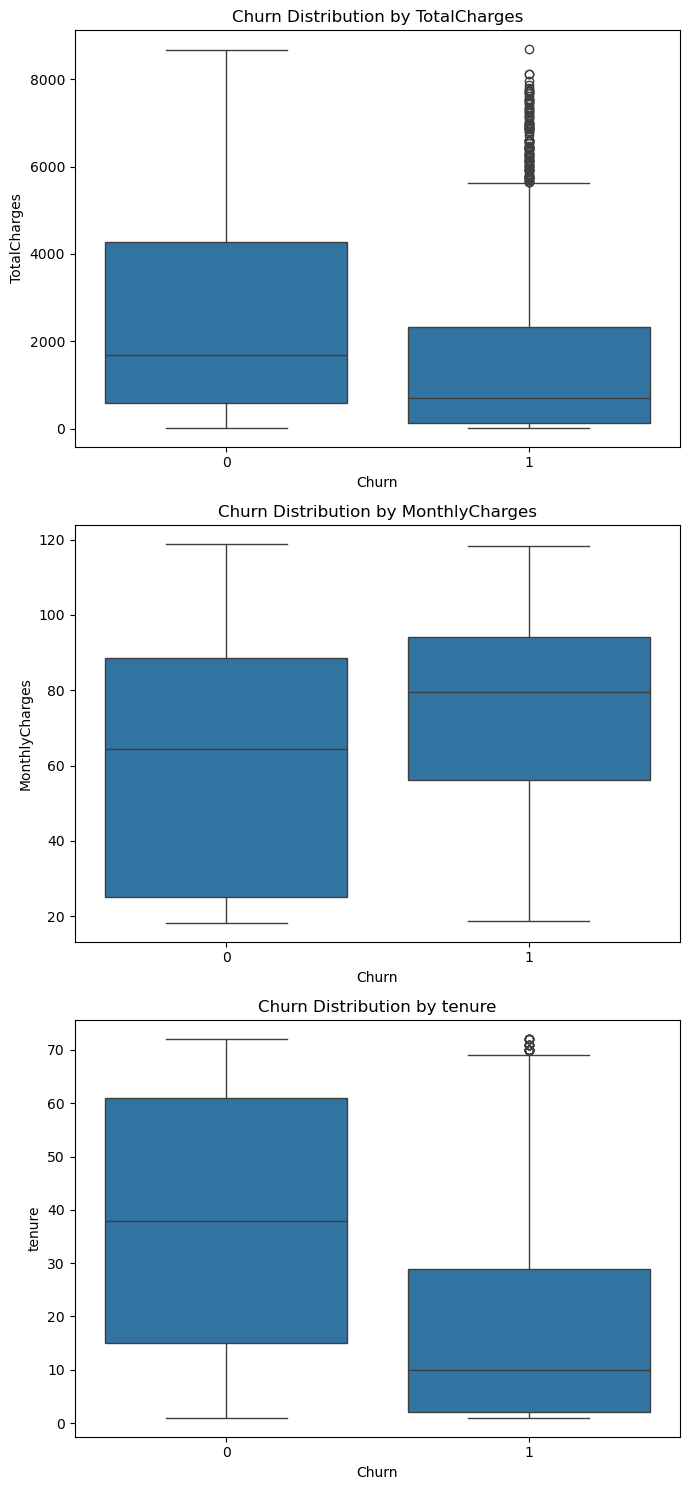

In [20]:
# Visualize numeric features vs churn
numeric_features = ['TotalCharges', 'MonthlyCharges', 'tenure']

plt.figure(figsize=(7, 15))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 1, i)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Churn Distribution by {col}')
    plt.tight_layout()

plt.show()

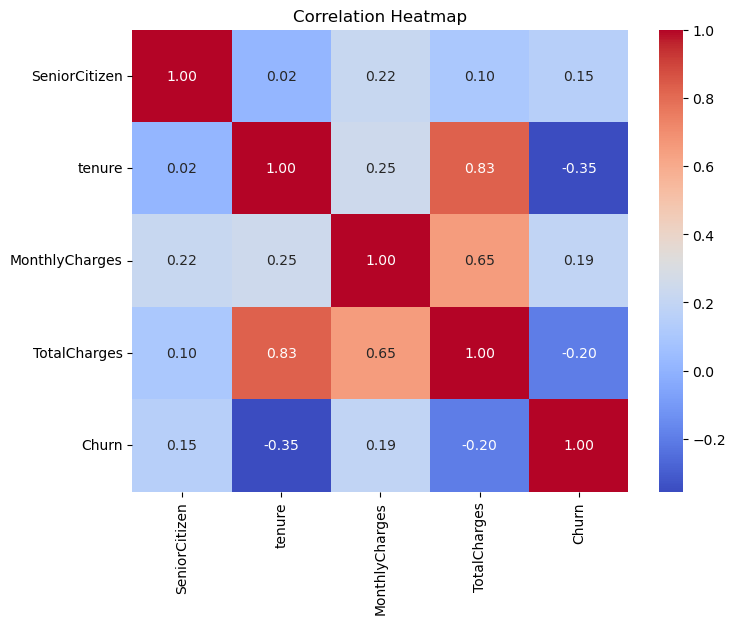

In [21]:
# Correlation Heatmap (for numeric features) - to help identify multicollinearity or strong numeric patterns

# Select only numeric features/columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')

plt.show()

# Data Processing

Preparing our data for machine learning


**Encoding categorical variables**

In [22]:
# Get only object type columns
obj_col = df.select_dtypes(include=['object']).columns.to_list()
obj_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [23]:
# Separate binary and multi-class categorical columns
binary_cols = [col for col in obj_col if df[col].nunique() == 2]
multi_class_cols = [col for col in obj_col if df[col].nunique() > 2]

binary_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [24]:
multi_class_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [25]:
# dataframe of binary and multi-class categorical columns

summary = pd.DataFrame({
    'Column/Feautres': obj_col,
    'Cnt_Unique_Values': [df[col].nunique() for col in obj_col],
    'Unique_Values': [df[col].unique() for col in obj_col],
    'Type': ['Binary' if df[col].nunique() == 2 else 'Multi-class' for col in obj_col]
}) 

summary.sort_values(by='Cnt_Unique_Values', ascending=True)

,Column/Feautres,Cnt_Unique_Values,Unique_Values,Type
0,gender,2,"[Female, Male]",Binary
1,Partner,2,"[Yes, No]",Binary
2,Dependents,2,"[No, Yes]",Binary
3,PhoneService,2,"[No, Yes]",Binary
13,PaperlessBilling,2,"[Yes, No]",Binary
4,MultipleLines,3,"[No phone service, No, Yes]",Multi-class
6,OnlineSecurity,3,"[No, Yes, No internet service]",Multi-class
5,InternetService,3,"[DSL, Fiber optic, No]",Multi-class
7,OnlineBackup,3,"[Yes, No, No internet service]",Multi-class
8,DeviceProtection,3,"[No, Yes, No internet service]",Multi-class


#### Encoding categorical features

LabelEncoding for binary class

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# LabelEncoding for binary class
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    
df[binary_cols].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling
customerID,,,,,
7590-VHVEG,0,1,0,0,1
5575-GNVDE,1,0,0,1,0
3668-QPYBK,1,0,0,1,1
7795-CFOCW,1,0,0,0,0
9237-HQITU,0,0,0,1,1


OneHot Encoding for multi-class features

In [27]:
# OneHotEncoding for multi-class features/columns
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [28]:
# Identify boolean columns
bool_cols = df.select_dtypes(include=['bool']).columns.to_list()
bool_cols

['MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [29]:
# Convert only boolean columns to integer (0 and 1)
df[bool_cols] = df[bool_cols].astype(int)
df[bool_cols].head()

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5575-GNVDE,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3668-QPYBK,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7795-CFOCW,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
9237-HQITU,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Future Scaling

Scaling numeric features like tenure, MonthlyCharges and TotalCharges to ensure consistent value ranges.

In [30]:
from sklearn.preprocessing import StandardScaler

# Future Scaling
scaler = StandardScaler()

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols].head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,-1.280248,-1.161694,-0.994194
5575-GNVDE,0.064303,-0.260878,-0.173740
3668-QPYBK,-1.239504,-0.363923,-0.959649
7795-CFOCW,0.512486,-0.747850,-0.195248
9237-HQITU,-1.239504,0.196178,-0.940457


Separate features and Target Variables

    X: the input features (independent variables)
    y: the target variable (what we want to predict)

In [31]:
# Target variable
y = df['Churn']
X = df.drop('Churn', axis=1)

Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Handle class imbalance in training data

In [33]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance in training data
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)



In [34]:
y_train_resample.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

#### Build a Model Pipeline

A pipeline that allows you to:
    
    -Organize preprocessing and model training into a single workflow
    -Ensure consistent application of transformations
    -Prevent data leakage
    

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

Train and Evaluate the models

In [36]:
# Models to compare
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

In [37]:
# Pipeline that includes model training and evaluation
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('model', model)
    ])
    
    # Train the model
    pipeline.fit(X_train_resample, y_train_resample)
    
    # Predict on test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    #print("-" * 60)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.74      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.76      1407

Model: Random Forest
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1033
           1       0.56      0.65      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.79      0.77      0.78      1407

Model: XGBoost
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1033
           1       0.55      0.67      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted av